In [ ]:
! pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


Import libraries

In [ ]:
import yfinance as yf
from pprint import pprint

Download ticker history OHLCV

In [31]:
TICKER = "SPY"

ticker = yf.Ticker(TICKER)
appl_data = ticker.history(period="30d")
appl_data = appl_data.reset_index(drop=True)

print(appl_data.head(3))

         Open        High         Low       Close    Volume  Dividends  \
0  596.059998  601.340027  595.469971  601.299988  33160100        0.0   
1  599.500000  602.479980  598.080017  601.340027  41219100        0.0   
2  597.539978  597.780029  590.760010  595.010010  64969300        0.0   

   Stock Splits  Capital Gains  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  


Download ticker history Option chain data

In [32]:
ticker = yf.Ticker(TICKER)

all_data = []

all_options_data = ticker.options

for k, option in enumerate(all_options_data): # all the expirations dates
    option_data = ticker.option_chain(option)
    print(k) #,option_data.calls.columns)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [36]:
option_expiration_date = '2025-02-14'

In [37]:
option_data = ticker.option_chain(option_expiration_date)
option_data

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0    SPY250214C00375000 2025-02-07 19:05:45+00:00   375.0     226.00  225.69   
1    SPY250214C00420000 2025-02-04 14:39:34+00:00   420.0     179.30  180.74   
2    SPY250214C00440000 2025-01-23 21:11:40+00:00   440.0     170.64  160.76   
3    SPY250214C00450000 2025-02-06 20:52:06+00:00   450.0     157.48  150.78   
4    SPY250214C00455000 2025-01-07 20:51:52+00:00   455.0     136.01    0.00   
..                  ...                       ...     ...        ...     ...   
104  SPY250214C00680000 2025-02-06 17:48:42+00:00   680.0       0.01    0.00   
105  SPY250214C00685000 2025-01-24 16:18:05+00:00   685.0       0.03    0.00   
106  SPY250214C00690000 2025-01-29 14:30:06+00:00   690.0       0.01    0.00   
107  SPY250214C00695000 2025-01-28 15:22:10+00:00   695.0       0.02    0.00   
108  SPY250214C00700000 2025-02-03 20:06:25+00:00   700.0       0.01    0.00   

        ask    change  pe

In [38]:
option_data.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY250214P00375000,2025-02-07 17:33:15+00:00,375.0,0.01,0.0,0.01,0.0,0.0,1.0,1157,0.984375,False,REGULAR,USD
1,SPY250214P00380000,2025-02-07 20:13:28+00:00,380.0,0.01,0.0,0.01,0.0,0.0,5.0,824,0.968750,False,REGULAR,USD
2,SPY250214P00385000,2025-02-04 21:06:09+00:00,385.0,0.01,0.0,0.01,0.0,0.0,220.0,448,0.937501,False,REGULAR,USD
3,SPY250214P00390000,2025-02-05 15:11:26+00:00,390.0,0.01,0.0,0.01,0.0,0.0,240.0,527,0.906251,False,REGULAR,USD
4,SPY250214P00395000,2025-02-05 15:14:46+00:00,395.0,0.01,0.0,0.01,0.0,0.0,1.0,1531,0.875001,False,REGULAR,USD


(240.30800781250002, 1081.38603515625)

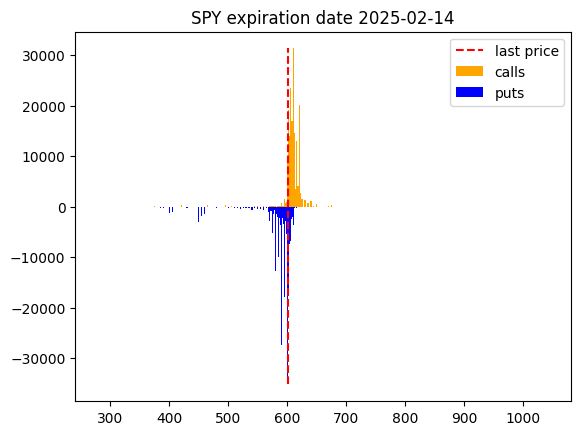

In [39]:
import matplotlib.pyplot as plt
import yfinance as yf
from pprint import pprint

plt.title( f"{TICKER} expiration date {option_expiration_date}" )

plt.bar( option_data.calls['strike'] , option_data.calls['volume'] , width = 2 , align = 'center' , color = 'orange' )
plt.bar( option_data.puts['strike'] , -option_data.puts['volume'] , width = 2 , align = 'center' , color = 'blue' )

plt.vlines( x = appl_data['Close'].iloc[-1],
           ymin = min(-option_data.puts['volume']) ,
           ymax = max(option_data.calls['volume']) ,
           linestyles = '--',
           colors = 'red' )

plt.legend( [ 'last price' , 'calls' , 'puts' ] )
plt.xlim([appl_data['Close'].iloc[-1]*0.4, appl_data['Close'].iloc[-1]*1.8])


(240.30800781250002, 901.155029296875)

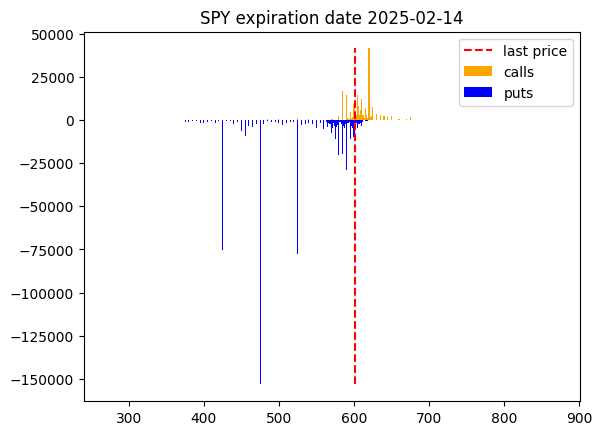

In [41]:
plt.title(f"{TICKER} expiration date {option_expiration_date}")

plt.bar(option_data.calls['strike'], option_data.calls['openInterest'],width=1.5,align='center',color='orange')
plt.bar(option_data.puts['strike'], -option_data.puts['openInterest'],width=1.5,align='center',color='blue')

plt.vlines( x = appl_data['Close'].iloc[-1],ymin=min(-option_data.puts['openInterest']) ,
            ymax=max(option_data.calls['openInterest']) ,
            linestyles='--',
            colors='red')

plt.legend( [ 'last price' , 'calls' , 'puts' ] )

plt.xlim([appl_data['Close'].iloc[-1]*0.4, appl_data['Close'].iloc[-1]*1.5])

In [43]:
import yfinance as yf

aapl = yf.Ticker(TICKER)
expiration_date = aapl.options[0]
options_chain = aapl.option_chain(expiration_date)
options_chain

#options_chain.calls.to_csv("aapl_calls.csv")
#options_chain.puts.to_csv("aapl_puts.csv")

Options(calls=        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0   SPY250210C00400000 2025-02-07 14:50:15+00:00   400.0     207.86  200.39   
1   SPY250210C00405000 2025-01-31 16:50:12+00:00   405.0     204.10  195.39   
2   SPY250210C00430000 2025-01-31 15:44:23+00:00   430.0     179.46  170.39   
3   SPY250210C00485000 2025-01-31 16:33:52+00:00   485.0     125.01  115.40   
4   SPY250210C00525000 2025-01-30 16:21:33+00:00   525.0      77.77   75.41   
..                 ...                       ...     ...        ...     ...   
59  SPY250210C00635000 2025-02-06 18:49:28+00:00   635.0       0.01    0.00   
60  SPY250210C00640000 2025-02-07 15:13:20+00:00   640.0       0.01    0.00   
61  SPY250210C00645000 2025-02-07 15:33:01+00:00   645.0       0.01    0.00   
62  SPY250210C00650000 2025-02-03 18:30:23+00:00   650.0       0.01    0.00   
63  SPY250210C00680000 2025-01-28 20:47:50+00:00   680.0       0.01    0.00   

       ask    change  percentChange  

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt


def bs_gamma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

aapl = yf.Ticker(TICKER)
EXPIRATION_DATE = option_expiration_date
opt = aapl.option_chain(EXPIRATION_DATE)

df = pd.DataFrame(opt.calls)
specific_date = datetime.date(2023, 6, 2)
today = datetime.date.today()
difference = specific_date - today
df['Gamma'] = bs_gamma(df['lastPrice'], df['strike'], difference.days / 365, 0.01, df['impliedVolatility'])
df['level_call'] = df['Gamma'] * df['openInterest']

df2 = pd.DataFrame(opt.puts)
specific_date = datetime.date(2023, 6, 2)
today = datetime.date.today()
difference = specific_date - today
df2['Gamma'] = bs_gamma(df2['lastPrice'], df2['strike'], difference.days / 365, 0.01, df2['impliedVolatility'])
df2['level_puts'] = df2['Gamma'] * df2['openInterest']


plt.plot(df['strike'],df["level_call"],color='green')
plt.plot(df2['strike'],df2["level_puts"],color='red')

NameError: name 'TICKER' is not defined

<BarContainer object of 172 artists>

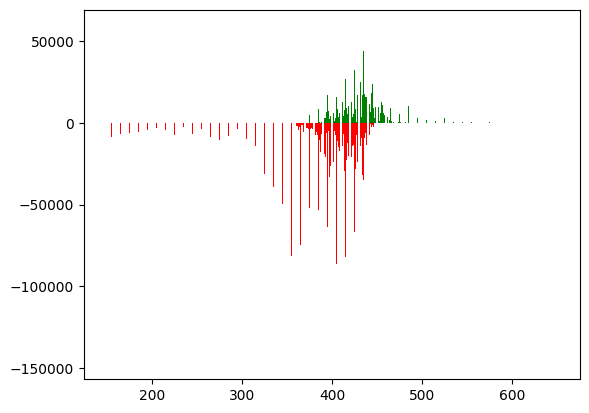

In [ ]:
plt.bar(df['strike'],df["openInterest"],color='green')
plt.bar(df2['strike'],-df2["openInterest"],color='red')

<BarContainer object of 172 artists>

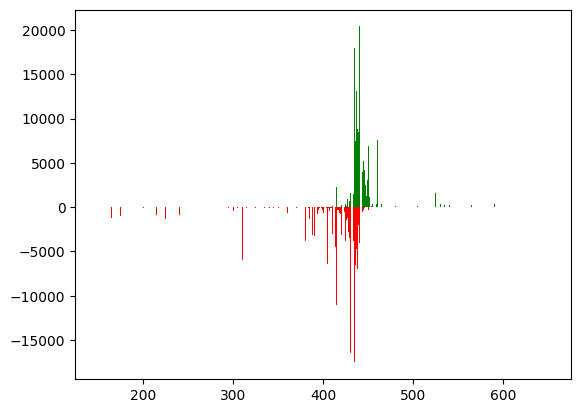

In [ ]:
plt.bar(df['strike'],df["volume"],color='green')
plt.bar(df2['strike'],-df2["volume"],color='red')

In [ ]:
import yfinance as yf
from scipy.stats import norm
import numpy as np

aapl = yf.Ticker("AAPL")
aapl_data = aapl.history(period="90d")
aapl_close = aapl_data['Close']


def black_scholes_call_gamma(S, K, T, r, sigma):
    """
    S is the stock price
    K is the strike price
    T is the time to expiration
    r is the risk-free interest rate
    Sigma is the volatility of the stock.
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma


# sigma calculation
returns = aapl_data['Close'].pct_change()
sigma = np.sqrt(252) * np.std(returns)
z_score = norm.ppf(0.975)
call_sigma = z_score * sigma

# data calculation
stock_price = aapl_close[-1]
time_decay = 30 / 365
risk_free_rate = 0.01


df['gamma'] = None
df['GEX'] = None

df2['gamma'] = None
df2['GEX'] = None

for index, strike_price in df['strike'].items():
    call_gamma = black_scholes_call_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
    df.loc[index,'gamma'] = call_gamma
    df.loc[index,'GEX'] = call_gamma * df.loc[index,'openInterest']

for index, strike_price in df2['strike'].items():
    puts_gamma = black_scholes_call_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
    df2.loc[index,'gamma'] = puts_gamma
    df2.loc[index,'GEX'] = puts_gamma * df2.loc[index,'openInterest']

merged_df = pd.merge(df, df2, on='strike')


df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Gamma,level_call,gamma,GEX
0,SPY230721C00150000,2023-06-28 20:08:17+00:00,150.0,287.35,287.46,288.06,0.0,0.0,8.0,16,0.000010,True,REGULAR,USD,NaN,NaN,0.001507,0.024119
1,SPY230721C00155000,2023-06-28 20:11:37+00:00,155.0,282.21,282.48,283.05,0.0,0.0,15.0,13,0.000010,True,REGULAR,USD,NaN,NaN,0.002906,0.037774
2,SPY230721C00160000,2023-06-26 13:30:08+00:00,160.0,273.28,277.45,278.04,0.0,0.0,6.0,8,0.000010,True,REGULAR,USD,NaN,NaN,0.005005,0.040041
3,SPY230721C00165000,2023-03-28 19:23:14+00:00,165.0,231.66,248.09,249.15,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD,NaN,NaN,0.00778,0.00778
4,SPY230721C00170000,2023-06-28 20:04:18+00:00,170.0,267.27,267.54,268.10,0.0,0.0,2.0,2,1.156254,True,REGULAR,USD,NaN,NaN,0.011008,0.022015


In [ ]:
merged_df = pd.merge(df, df2, on='strike')
merged_df.head()

,contractSymbol_x,lastTradeDate_x,strike,lastPrice_x,bid_x,ask_x,change_x,percentChange_x,volume_x,openInterest_x,...,volume_y,openInterest_y,impliedVolatility_y,inTheMoney_y,contractSize_y,currency_y,Gamma_y,level_puts,gamma_y,GEX_y
0,SPY230721C00150000,2023-06-28 20:08:17+00:00,150.0,287.35,287.46,288.06,0.0,0.0,8.0,16,...,43.0,32621,1.218754,False,REGULAR,USD,NaN,NaN,0.001507,49.174941
1,SPY230721C00155000,2023-06-28 20:11:37+00:00,155.0,282.21,282.48,283.05,0.0,0.0,15.0,13,...,2.0,8762,1.187504,False,REGULAR,USD,NaN,NaN,0.002906,25.459403
2,SPY230721C00160000,2023-06-26 13:30:08+00:00,160.0,273.28,277.45,278.04,0.0,0.0,6.0,8,...,315.0,4849,1.156254,False,REGULAR,USD,NaN,NaN,0.005005,24.270124
3,SPY230721C00165000,2023-03-28 19:23:14+00:00,165.0,231.66,248.09,249.15,0.0,0.0,NaN,1,...,1245.0,7042,1.125004,False,REGULAR,USD,NaN,NaN,0.00778,54.787024
4,SPY230721C00170000,2023-06-28 20:04:18+00:00,170.0,267.27,267.54,268.10,0.0,0.0,2.0,2,...,5.0,5798,1.093755,False,REGULAR,USD,NaN,NaN,0.011008,63.822125


(306.66124572753904, 569.5137420654297)

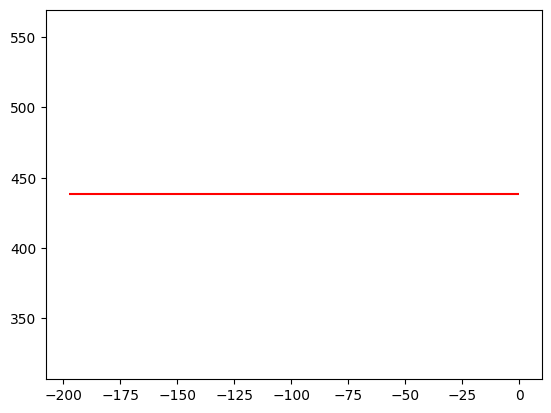

In [ ]:
plt.barh(merged_df['strike'], merged_df['GEX_x'])
plt.barh(merged_df['strike'], -merged_df['GEX_y'])

plt.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX_y']), xmax = max(merged_df['GEX_x']),colors='red')
plt.ylim([appl_data['Close'].iloc[-1]*0.7, appl_data['Close'].iloc[-1]*1.3])

In [ ]:
merged_df['GEX'] = merged_df['GEX_x'] - merged_df['GEX_y']

In [ ]:
#plt.barh(merged_df['strike'], merged_df['GEX'] )
#plt.plot(aapl_data.index- len(aapl_data.index) , aapl_data['Close'],color='black')
#plt.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')
#plt.ylim([appl_data['Close'].iloc[-1]*0.7, appl_data['Close'].iloc[-1]*1.3])
#plt.xlim([min(merged_df['GEX']),  max(merged_df['GEX'])])

In [ ]:
# fig, ax = plt.subplots()
# fig.set_figheight(15)
# fig.set_figwidth(15)

# ax.barh(merged_df['strike'], merged_df['GEX'] )
# ax.plot(aapl_data.index- len(aapl_data.index) , aapl_data['Close'],color='black')
# ax.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')

# ax.set_title(f"{TICKER} expiration date {option_expiration_date}")

# ax.legend( [ 'GEX Levels','last price' ] )

# for i, value in enumerate(merged_df['strike']):
#     side = 'right'
#     if merged_df['GEX'].iloc[i]>0: side = 'left'
#     if merged_df['GEX'].iloc[i]>0.5 or merged_df['GEX'].iloc[i]< -0.5:
#         ax.text(merged_df['GEX'].iloc[i], merged_df['strike'].iloc[i], str(round(merged_df['strike'].iloc[i])), ha=side, va='center')

# ax.text(0,appl_data['Close'].iloc[-1], str(round(appl_data['Close'].iloc[-1])), ha='left', va='center',fontsize=13)

# ax.text(100,merged_df['strike'].mean(), str(f"GEX levels \n {TICKER} expiration date {option_expiration_date} "), ha='left', va='center',fontsize=13,color='green', rotation='horizontal')

# ax.set_xlim([min(merged_df['GEX']),  max(merged_df['GEX'])])
# ax.set_ylim(bottom=appl_data['Close'].iloc[-1]*0.6,top=appl_data['Close'].iloc[-1]*1.4)

 Trading with SPDR S&P 500 ETF Trust
Index(['contractSymbol_x', 'lastTradeDate_x', 'strike', 'lastPrice_x', 'bid_x',
       'ask_x', 'change_x', 'percentChange_x', 'volume_x', 'openInterest_x',
       'impliedVolatility_x', 'inTheMoney_x', 'contractSize_x', 'currency_x',
       'gamma_x', 'GEX_x', 'contractSymbol_y', 'lastTradeDate_y',
       'lastPrice_y', 'bid_y', 'ask_y', 'change_y', 'percentChange_y',
       'volume_y', 'openInterest_y', 'impliedVolatility_y', 'inTheMoney_y',
       'contractSize_y', 'currency_y', 'gamma_y', 'GEX_y', 'GEX'],
      dtype='object')
strike 580.0 -145.39054480082638 
strike 590.0 -127.75997453839466 
strike 525.0 -107.86087428985472 
strike 575.0 -79.65745238816413 
strike 595.0 -55.809435998086265 
strike 570.0 -45.75517166776004 
strike 587.0 -36.69778070186564 
strike 577.0 -31.804412442664155 
strike 572.0 -31.247008682219764 
strike 560.0 -27.67374207207432 
strike 620.0 358.9426833685228 
strike 605.0 94.32825008705595 
strike 610.0 82.6043565099

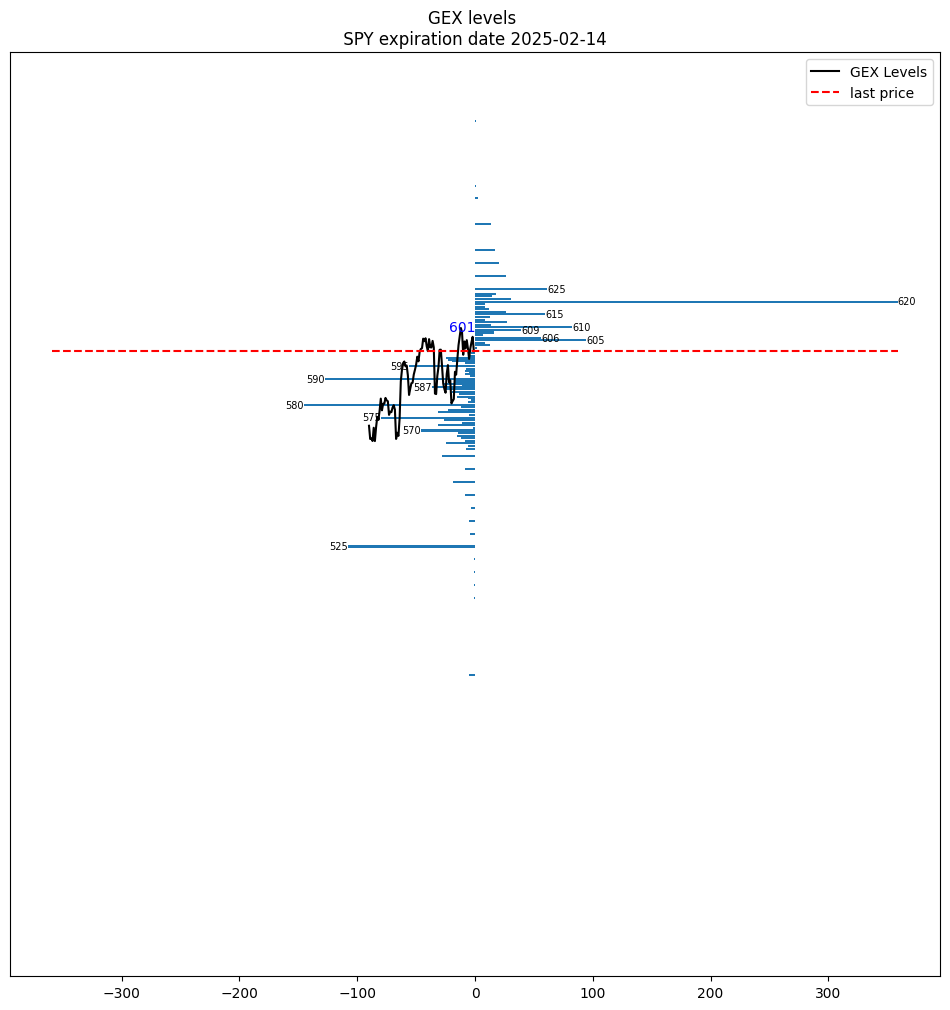

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
from scipy.stats import norm

import yfinance as yf


def black_scholes_gamma(S, K, T, r, sigma):
    """
    S is the stock price
    K is the strike price
    T is the time to expiration
    r is the risk-free interest rate
    Sigma is the volatility of the stock.
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma


def get_gex_dataframe(ticker="AAPL", expiration_date = '2023-06-02', period="30d"):

    ticker_ = yf.Ticker(ticker)
    data = ticker_.history(period=period)
    data = data.reset_index(drop=True)

    try:
        ticker_info = ticker_.info
        real_name = ticker_info["longName"]
        print(f" Trading with {real_name}")
    except:
        pass

    option_data = ticker_.option_chain(expiration_date)

    df = pd.DataFrame(option_data.calls)
    df2 = pd.DataFrame(option_data.puts)

    # sigma calculation
    returns = data['Close'].pct_change()
    sigma = np.sqrt(252) * np.std(returns)
    z_score = norm.ppf(0.975)
    call_sigma = z_score * sigma

    # data calculation
    time_decay = 30 / 365
    risk_free_rate = 0.01

    stock_price = data['Close'].iloc[-1]

    df['gamma'] = None
    df['GEX'] = None

    df2['gamma'] = None
    df2['GEX'] = None

    for index, strike_price in df['strike'].items():
        call_gamma = black_scholes_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
        df.loc[index,'gamma'] = call_gamma
        df.loc[index,'GEX'] = call_gamma * df.loc[index,'openInterest']

    for index, strike_price in df2['strike'].items():
        puts_gamma = black_scholes_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
        df2.loc[index,'gamma'] = puts_gamma
        df2.loc[index,'GEX'] = puts_gamma * df2.loc[index,'openInterest']

    merged_df = pd.merge(df, df2, on='strike')
    merged_df['GEX'] = merged_df['GEX_x'] - merged_df['GEX_y']
    return data, merged_df



def final_plot(asset_data, merged_df,title='title',show_strike=False,set_boundries=False):
    fig, ax = plt.subplots()
    fig.set_figheight(12)
    fig.set_figwidth(12)

    ax.barh(merged_df['strike'], merged_df['GEX'] )
    ax.plot(asset_data.index- len(asset_data.index) , asset_data['Close'],color='black')
    ax.hlines(asset_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')

    ax.set_title(title)

    ax.legend( [ 'GEX Levels','last price' ] )

    merged_df['GEX'] = merged_df['GEX'].astype(float)

    df = pd.DataFrame(merged_df, columns=['GEX'])
    most_extreme_values = pd.concat([df.nsmallest(10, 'GEX'), df.nlargest(10, 'GEX')])

    for k,v in zip(most_extreme_values.index, most_extreme_values.values):
        print(f"strike {merged_df['strike'].iloc[k]} {v[0]} ")

    peaks_strikes = merged_df['strike'].iloc[most_extreme_values.index].to_list()

    if show_strike:
        for i, value in enumerate(merged_df['strike']):
            if (merged_df['GEX'].iloc[i]>max(merged_df['GEX'] / 10 ) or merged_df['GEX'].iloc[i]< -max(merged_df['GEX'] / 10 )) and value in peaks_strikes:

                side = 'right'
                if merged_df['GEX'].iloc[i]>0:
                    side = 'left'

                ax.text(merged_df['GEX'].iloc[i],
                        merged_df['strike'].iloc[i],
                        str(round(merged_df['strike'].iloc[i])),
                        ha=side,
                        va='center',
                        fontsize=7,
                        )

    ax.text(0,asset_data['Close'].iloc[-1]*1.02,
            str(round(asset_data['Close'].iloc[-1])),
            ha='right',
            va='top',
            color='blue',
            fontsize=10)

    #ax.text(100,merged_df['strike'].mean(), str(title), ha='left', va='center',fontsize=13,color='green', rotation='horizontal')

    if set_boundries:
        ax.set_xlim([min(merged_df['GEX'])*1.3,  max(merged_df['GEX'])*1.1])
        ax.set_ylim(bottom=asset_data['Close'].iloc[-1]*0.5,top=asset_data['Close'].iloc[-1]*1.3)
    ax.set_yticks([])


tickers_SNP500 = ['MA','XOM','HD','V','META','JPM','KO','GOOGL','BRK.B','MSFT','NVDA','AAPL','SPY','TSLA']
tickers_yahoofinance = ['SPY','GOOGL','BRK.B','MSFT','NVDA','AAPL','SPY','TSLA']
tickers_ninjatrader = ['SPY']


# ONLY FUTURES & OPTIONS compatible with yahoo finance
TICKER = "SPY"

period_asset_price="max"
period_asset_price="90d"

avaiable_expiration_dates = "[2023-06-02, 2023-06-09, 2023-06-16, 2023-06-23, 2023-06-30, 2023-07-07, 2023-07-21, 2023-08-18, 2023-09-15, 2023-10-20, 2023-11-17, 2023-12-15, 2024-01-19, 2024-03-15, 2024-06-21, 2024-09-20, 2024-12-20, 2025-01-17, 2025-06-20, 2025-12-19]"
avaiable_expiration_dates = [i.replace('[','').replace(']','').replace(' ','') for i in avaiable_expiration_dates.split(',')]

expiration_date = avaiable_expiration_dates[4]
expiration_date = "2025-02-14"




asset_data , merged_df = get_gex_dataframe( ticker = TICKER, expiration_date = expiration_date , period=period_asset_price )

print(merged_df.columns)

final_plot(asset_data, merged_df,
          show_strike=True,
          set_boundries=False,
          title=f"GEX levels \n {TICKER} expiration date {expiration_date} ")


Delta Neutral Hedging

In [ ]:
import yfinance as yf
from py_vollib.black_scholes.implied_volatility import implied_volatility
from py_vollib.black_scholes.greeks.analytical import delta


# Define the ticker symbol
ticker_symbol = "SPY"

# Fetch the option chain data for the ticker symbol
option_chain = yf.Ticker(ticker_symbol).option_chain(option_expiration_date)

# Get the option chain DataFrame
options = option_chain.calls

# Get the option chain DataFrames for calls and puts
calls = option_chain.calls
puts = option_chain.puts

# Calculate delta for each call option
calls["Delta"] = calls.apply(
    lambda row: delta("c", row["strike"], row["lastPrice"], 0.05 , 5 / 365, row["impliedVolatility"]),
    axis=1
)

# Calculate delta for each put option
puts["Delta"] = puts.apply(
    lambda row: delta("p", row["strike"], row["lastPrice"], 0.05, 5 / 365, row["impliedVolatility"]),
    axis=1
)

# Concatenate calls and puts into a single DataFrame
options = pd.concat([calls, puts])

# Sort the options based on delta
sorted_options = options.sort_values("Delta")

# Find the option with delta closest to zero
delta_neutral_option = sorted_options.iloc[abs(sorted_options["Delta"]).idxmin()]

# Get the strike price for the delta-neutral option
delta_neutral_strike = delta_neutral_option["strike"]

print("Delta Neutral Strike Price:", delta_neutral_strike)


Delta Neutral Strike Price: 427.0


In [ ]:
merged_df['GEX']


0     -1.601087e-42
1     -1.990075e-40
2     -3.502148e-38
3     -1.144630e-35
4     -1.535018e-33
           ...     
156    2.516796e-03
157    7.180313e-05
158    9.238741e-04
159    4.338685e-06
160    4.551652e-06
Name: GEX, Length: 161, dtype: float64

In [ ]:
# merged_df['strike'].iloc[most_extreme_values.index]

In [ ]:
# 410.0 in merged_df['strike'].iloc[most_extreme_values.index].to_list()

In [ ]:
# GET MOST EXTREMES VALUES
merged_df['GEX'] = merged_df['GEX'].astype(float)

df = pd.DataFrame(merged_df, columns=['GEX'])
most_extreme_values = pd.concat([df.nsmallest(5, 'GEX'), df.nlargest(5, 'GEX')])
most_extreme_values.index
#ost_extreme_values.values

Int64Index([91, 71, 86, 76, 81, 121, 111, 130, 116, 115], dtype='int64')

In [ ]:
most_extreme_values

,GEX
91,-935.181095
71,-503.600212
86,-500.552135
76,-465.926489
81,-447.886972
121,445.288210
111,296.487021
130,293.990025
116,271.889741
115,189.822753


In [ ]:
for k,v in zip(most_extreme_values.index,most_extreme_values.values):
    #print(k,v[0])
    print(f"strike {merged_df['strike'].iloc[k]} {v[0]} ")


strike 420.0 -935.1810947584356 
strike 400.0 -503.60021194613046 
strike 415.0 -500.55213450864926 
strike 405.0 -465.92648935532156 
strike 410.0 -447.886972195227 
strike 450.0 445.288210386794 
strike 440.0 296.4870213337488 
strike 460.0 293.9900253040938 
strike 445.0 271.8897413519789 
strike 444.0 189.82275289282114 


In [ ]:
peaks, _ = find_peaks(merged_df['GEX'] , distance = 4 )

for i in peaks:

    print(merged_df['GEX'].iloc[i])
    #print(merged_df['strike'].iloc[i], merged_df['GEX'].iloc[i])

-3.2910743273488555e-05
-0.6500872510070311
-2.7560694698660386
-4.204629250878171
-11.285790420193758
-8.634865378336677
9.343188773200474
-11.929936746789927
-6.976323524908011
-59.668669807265005
-77.8430508611011
-78.52791368307032
133.27394464376007
296.4870213337488
271.8897413519789
445.288210386794
137.42499471549738
293.9900253040938
107.38653059962665
56.18759546488928
51.06763200053289
0.6884108635361308
0.008287157260194094


In [ ]:
# DOWNLAOD DATA

# Set the ticker symbol for the desired asset
ticker_symbol = "ES=F"

# Set the start and end dates for the data
start_date = "2022-01-01"
end_date = "2022-12-31"

# Download the data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2022-01-03  4771.00  4791.25  4747.50  4786.00    4786.00  1322362
2022-01-04  4785.25  4808.25  4764.50  4784.25    4784.25  1392809
2022-01-05  4783.50  4788.25  4689.50  4692.50    4692.50  1856376
2022-01-06  4692.00  4715.75  4662.00  4687.50    4687.50  1862918
2022-01-07  4695.00  4705.75  4653.75  4667.75    4667.75  1618440
...             ...      ...      ...      ...        ...      ...
2022-12-23  3850.00  3872.50  3821.25  3869.75    3869.75  1374913
2022-12-27  3878.00  3900.50  3837.25  3855.00    3855.00  1006414
2022-12-28  3858.00  3875.00  3804.50  3807.50    3807.50  1282810
2022-12-29  3811.00  3882.75  3806.25  3871.75    3871.75  1146984
2022-12-30  3869.75  3871.00  3821.50  3861.00    3861.00  1401810

[252 rows x 6 columns]
